In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
License(s): other
top-spotify-songs-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

with zipfile.ZipFile('top-spotify-songs-2023.zip', 'r') as zip_ref: zip_ref.extractall('spotify_data')

df = pd.read_csv('spotify_data/spotify-2023.csv', encoding = 'latin1')
print('Shape of the dataset: ', df.shape)


Shape of the dataset:  (953, 24)


## Overview of Dataset

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Basic Descriptive Statistics

In [17]:
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')

mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

print('The mean is: ', mean_streams)
print('The median is: ', median_streams)
print('The standard deviation is: ', std_streams)

The mean is:  514137424.93907565
The median is:  290530915.0
The standard deviation is:  566856949.0388832


In [33]:
released_year_stats = df['released_year'].describe()
artist_count_stats = df['artist_count'].describe()

print('The released year statistics are:\n ', released_year_stats)

print('\nThe artist count statistics are:\n ', artist_count_stats)

The released year statistics are:
  count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

The artist count statistics are:
  count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


Text(0, 0.5, 'Frequency')

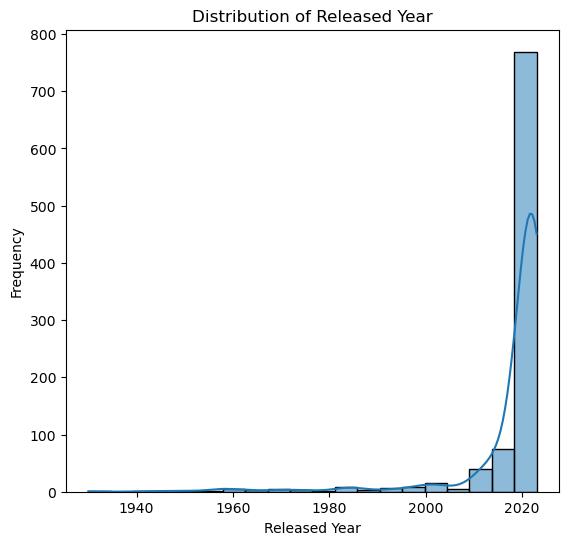

In [37]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['released_year'], kde = True, bins = 20)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

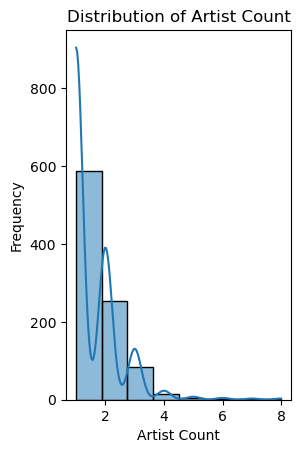

In [39]:
plt.subplot(1, 2, 2)
sns.histplot(df['artist_count'], kde = True, bins = 8)
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')

In [45]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize = (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Box Plot of Released Year')

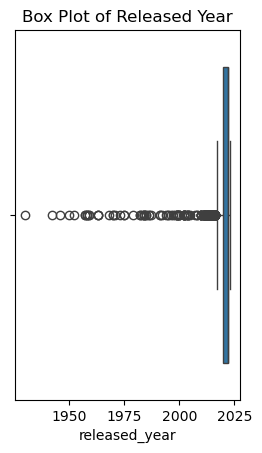

In [51]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['released_year'])
plt.title('Box Plot of Released Year')

Text(0.5, 1.0, 'Box Plot of Artist Count')

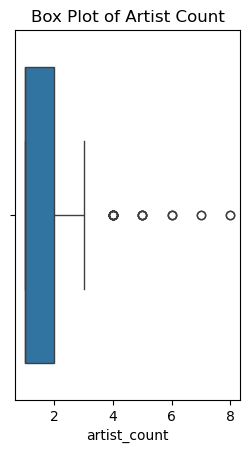

In [53]:
plt.subplot(1, 2, 2)
sns.boxplot(x = df['artist_count'])
plt.title('Box Plot of Artist Count')

In [57]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [59]:
for column in ['released_year', 'artist_count']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print(f'Outliers in {column}: ')
print(outliers[[column]])
print('\n')

Outliers in artist_count: 
     artist_count
35              8
135             4
137             5
141             4
197             4
200             4
201             5
238             5
328             5
365             4
393             6
402             6
457             4
488             4
506             7
540             4
605             4
638             4
642             8
667             7
749             4
759             6
833             4
837             4
864             5
894             4
920             4




##  Top Performers

In [83]:
# Inspecting the first few rows
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [76]:
top_5_artists = df['artist(s)_name'].value_counts().head(5)
print(top_5_artists)

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


##  Temporal Trends

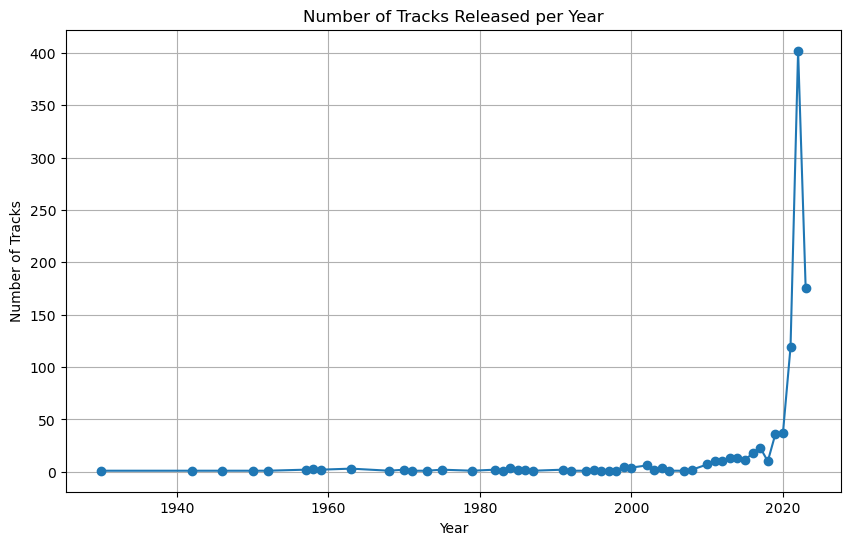

In [80]:
tracks_per_year = df['released_year'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
tracks_per_year.plot(kind = 'line', marker = 'o')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid()
plt.show()

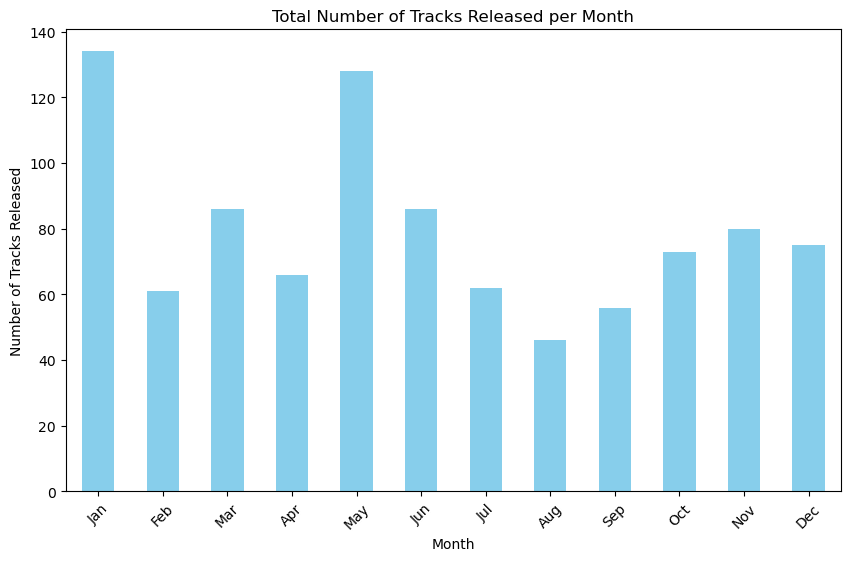

In [132]:
df = pd.read_csv('spotify_data/spotify-2023.csv', encoding = 'latin1')

df = df.dropna(subset = ['released_year', 'released_month'])

df['released_year'] = df['released_year'].astype(int)
df['released_month'] = df['released_month'].astype(int)

monthly_df = df.groupby('released_month')['track_name'].count()

monthly_df = monthly_df.reindex(range(1, 13), fill_value = 0)

plt.figure(figsize=(10, 6))
monthly_df.plot(kind='bar', color='skyblue')
plt.title('Total Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(ticks = range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 45)
plt.show()


##  Genre and Music Characteristics


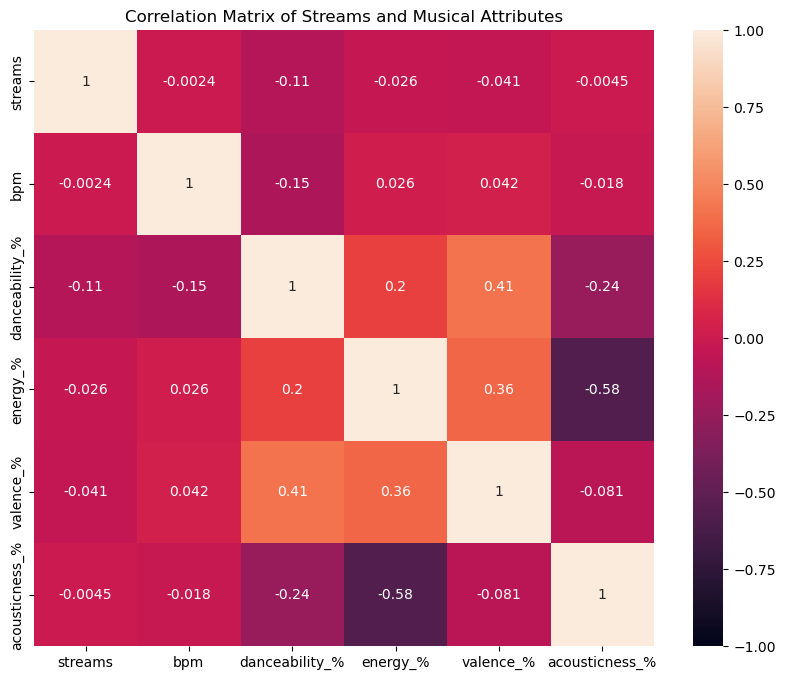

In [159]:
# List of columns to analyze
columns_of_interest = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']

# Convert columns to numeric, coercing errors to NaN to handle non-numeric data
for col in columns_of_interest:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

# Drop rows with NaN values in the selected columns to clean data
df_subset = df.dropna(subset = columns_of_interest)

# Calculate the correlation matrix
correlation_matrix = df_subset[columns_of_interest].corr()

# Visualize the correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Streams and Musical Attributes")
plt.show()


## Platform Popularity

In [177]:
results_simplified = {
    'Spotify Playlists': (df['in_spotify_playlists'].sum(), df['in_spotify_playlists'].mean()),
    'Spotify Charts': (df['in_spotify_charts'].sum(), df['in_spotify_charts'].mean()),
    'Apple Playlists': (df['in_apple_playlists'].sum(), df['in_apple_playlists'].mean()),
    'Apple Charts': (df['in_apple_charts'].sum(), df['in_apple_charts'].mean())
}

popularity_df = pd.DataFrame(results_simplified, index=['Total Count', 'Average Count per Track']).T
popularity_df

,Total Count,Average Count per Track
Spotify Playlists,4955719.0,5200.124869
Spotify Charts,11445.0,12.009444
Apple Playlists,64625.0,67.812172
Apple Charts,49469.0,51.908709


## Advanced Analysis

In [175]:
average_streams_by_key = df.groupby('key')['streams'].mean()

average_streams_by_mode = df.groupby('mode')['streams'].mean()

print("Average Streams by Key:")
print(average_streams_by_key)
print("\nAverage Streams by Mode:")
print(average_streams_by_mode)


Average Streams by Key:
key
A     4.088414e+08
A#    5.524754e+08
B     5.193480e+08
C#    6.042802e+08
D     5.295256e+08
D#    5.530365e+08
E     5.774972e+08
F     4.684464e+08
F#    5.223632e+08
G     4.525994e+08
G#    4.769119e+08
Name: streams, dtype: float64

Average Streams by Mode:
mode
Major    5.348328e+08
Minor    4.859445e+08
Name: streams, dtype: float64


In [181]:
artist_playlist_chart_counts = df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']].sum()

artist_playlist_chart_counts['total_appearances'] = artist_playlist_chart_counts.sum(axis=1)

top_artists = artist_playlist_chart_counts.sort_values(by='total_appearances', ascending=False).head(10)

top_artists


,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,total_appearances
artist(s)_name,,,,,
The Weeknd,144053,180,1677,1348,147258
Taylor Swift,132974,542,1796,1866,137178
Ed Sheeran,128758,94,1448,488,130788
Harry Styles,110026,185,1741,545,112497
Eminem,87331,152,475,281,88239
Arctic Monkeys,84016,190,241,340,84787
Coldplay,75716,72,381,25,76194
Avicii,68241,42,407,282,68972
"Dr. Dre, Snoop Dogg",65728,0,283,118,66129
